In [1]:
from PIL import Image
import torchvision.io as io

# 이미지를 불러옵니다.
image_path = '../PAST/img_data4/14998_AV.png'  # 이미지 파일 경로를 적절히 수정하세요.
# image_path = 'rb.png'
image = Image.open(image_path)
image = io.read_image(image_path)

# 이미지의 크기를 가져와서 출력합니다.
#width, height = image.size
#print("Image Size - Width:", width, "Height:", height)
print(image[:-1])

tensor([[[  0,   0,   0,  ...,   0,   0,   0],
         [  0,   0,   1,  ...,  20,  20,  18],
         [  0,   1,   2,  ...,  22,  22,  20],
         ...,
         [  0, 161, 171,  ..., 227, 227, 214],
         [  0, 161, 171,  ..., 227, 227, 214],
         [  0, 152, 161,  ..., 214, 214, 202]],

        [[  0,   0,   0,  ...,   0,   0,   0],
         [  0,   0,   1,  ...,  14,  14,  13],
         [  0,   1,   2,  ...,  15,  15,  14],
         ...,
         [  0,  48,  51,  ...,  78,  78,  73],
         [  0,  48,  51,  ...,  78,  78,  73],
         [  0,  45,  48,  ...,  73,  73,  68]],

        [[  0,   0,   0,  ...,   0,   0,   0],
         [  0,  11,  12,  ...,  55,  55,  51],
         [  0,  12,  13,  ...,  59,  59,  55],
         ...,
         [  0, 117, 124,  ..., 101, 101,  95],
         [  0, 117, 124,  ..., 101, 101,  95],
         [  0, 110, 117,  ...,  95,  95,  89]]], dtype=torch.uint8)


In [2]:
# tsv 파일 불러와서 label_x ={'1': [[0, 15]], '3':[[25, 35], [50, 80], [150, 200]]} 형태로 바꾸는 코드

import pandas as pd
import numpy as np

tsv_path = "../14998_AV.tsv"
df = pd.read_csv(tsv_path, delimiter='\t', names=['x_min', 'x_max', 'label'])
label_x = dict()

for row in df.iterrows():
    if row[1]['label'] in [1.0, 3.0]:
        if row[1]['label'] not in label_x:
            label_x[row[1]['label']] = []
        x_min = np.ceil(row[1]['x_min']*155)
        x_max = np.ceil(row[1]['x_max']*155)
        label_x[row[1]['label']].append([x_min, x_max])

print(label_x)


{1.0: [[0.0, 19.0], [86.0, 98.0], [166.0, 180.0], [247.0, 262.0], [327.0, 339.0], [408.0, 420.0], [487.0, 503.0], [570.0, 583.0], [648.0, 661.0], [661.0, 680.0], [747.0, 758.0]], 3.0: [[39.0, 53.0], [122.0, 133.0], [204.0, 216.0], [284.0, 293.0], [364.0, 375.0], [445.0, 455.0], [524.0, 534.0], [607.0, 617.0], [699.0, 714.0]]}


height 385
[384, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 357, 357, 357, 354, 354, 354, 354, 357, 357, 357, 357, 351, 351, 351, 351, 351, 351, 351, 351, 357, 357, 357, 357, 357, 357, 357, 357, 357, 357, 357, 360, 360, 360, 360, 357, 357, 357, 357, 360, 360, 360, 360, 357, 357, 357, 357, 360, 360, 360, 360, 357, 357, 357, 357, 360, 360, 360, 357, 357, 357, 357, 360, 360, 360, 360, 360, 360, 360, 360, 366, 366, 366, 366, 351, 351, 351, 351, 354, 354, 354, 354, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 357, 357, 357, 357, 354, 354, 354, 354, 360, 360, 360, 360, 363, 363, 363, 354, 354, 354, 354, 351, 351, 351, 351, 357, 357, 357, 357, 357, 357, 357, 357, 351, 351, 351, 351, 348, 348, 348, 348, 348, 348, 348, 348, 348, 348, 348, 348, 348, 348, 348, 348, 348, 348, 348, 348, 348, 348, 348, 345, 345, 345, 345, 351, 351, 351, 351, 348, 348, 348, 348, 348, 348, 348, 345, 345, 345, 345, 348, 348, 348, 348, 348, 348, 348, 348, 348, 348, 348, 348, 348

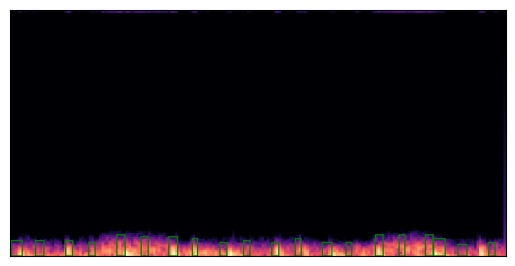

In [9]:
import torch
from torchvision.utils import draw_bounding_boxes
import torchvision.transforms as transforms
import torchvision.io as io
import matplotlib.pyplot as plt 
import torchvision.transforms.functional as F
import numpy as np 
import math

# 이미지 주소를 지정합니다.
image_path = "../PAST/img_data4/14998_AV.png"
# image_path = "./rb.png"
# 이미지를 불러옵니다.
image = io.read_image(image_path)


# 이미지의 높이와 너비를 가져옵니다.
height = image.size()[-2]
print('height', height)
width = image.size()[-1]

# 이미지의 모든 픽셀을 반복합니다.
# for y in range(height):
#     lst = []
#     max_height = 0
#     for x in range(50):
#         # 픽셀이 검정색이 아닌 경우
#         if not image[0, y, x] and not image[1, y, x] and not image[2, y, x]:
#             # 픽셀의 높이를 저장합니다.
#             #current_height = image[0, y, x]
#             lst.append(max_height)
#             current_height = y
#             if current_height > max_height:
#                 max_height = current_height
#     lst.append(max_height)
def show(imgs):
    if not isinstance(imgs, list): # 하나의 이미지일때
        imgs = [imgs]
    fig, axs = plt.subplots(ncols=len(imgs), squeeze=False) # 총 사진의 개수만큼 plot
    for i, img in enumerate(imgs):
        img = img.detach() # 학습 그래프에서 제외
        img = F.to_pil_image(img) # torch.tensor 에서 pil 이미지로 변환
        axs[0, i].imshow(np.asarray(img)) # numpy 배열로 변경후, 가로로 이미지를 나열
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])


y_list = list()
for x in range(width):
    
    max_height = 0
    for y in range(height): 
    # 픽셀이 검정색이 아닌 경우
        if image[2, y, x] <= 50 and y >= int(height / 2):
            # 픽셀의 높이를 저장합니다.
            if y > max_height:
                max_height = y
    y_list.append(max_height)

print(y_list)

'''
초로 이미지 비율에 맞췄을 경우 10초 = 780
ex) - 
0, 10 :1, 
25, 35 :3
'''
#label_x ={'blue': [[0, 15]], 'green':[[25, 35], [50, 80], [150, 200]]}
print(len(y_list))
label = list()
height = 385
for key, value in label_x.items():
    for v in value:
        if v[0] == 0:
            v[0] += 1
        if v[1] == width:
            v[1] -= 1    
        print(v)

        start = math.floor(v[0])
        end = math.ceil(v[1])
        min_y = max(y_list[start:end])
        label_data = [v[0], min_y, v[1], height, key]
        label.append(label_data)


# 가장 높은 높이를 출력합니다.
image = image[:-1]
for l in label:
    boxes = torch.tensor([l[:-1]], dtype=torch.float)
    colors = [l[:-1]]
    image = draw_bounding_boxes(image, boxes, colors=['green'], width=2)

show(image)
print(label)


In [4]:
import csv
# TSV 파일로 저장하는 함수
def save_to_tsv(data, filename):
    with open(filename, 'w', newline='') as tsvfile:
        writer = csv.writer(tsvfile, delimiter='\t')
        # 헤더 작성
        #writer.writerow(['col1', 'col2', 'col3', 'col4', 'col5'])
        # 데이터 작성
        writer.writerows(data)

# TSV 파일로 저장
save_to_tsv(label, 'output.tsv')

# 저장한 TSV 파일의 헤더 출력
df = pd.read_csv('output.tsv', delimiter='\t', header=None)
df.head()

,0,1,2,3,4
0,1.0,360,19.0,385,1.0
1,86.0,360,98.0,385,1.0
2,166.0,351,180.0,385,1.0
3,247.0,354,262.0,385,1.0
4,327.0,363,339.0,385,1.0


In [5]:
import os

folder_path = '../'
tsv_files = [f for f in os.listdir(folder_path) if f.endswith(".tsv")]

In [12]:
def save_bbox(image_path, tsv_path, output_path):

    # 이미지 불러오기
    image = io.read_image(image_path)


    # 이미지의 높이와 너비를 가져옵니다.
    height = image.size()[-2]
    print('height', height)
    width = image.size()[-1]

    # tsv 파일에 대하여 x_min, x_max
    df = pd.read_csv(tsv_path, delimiter='\t', names=['x_min', 'x_max', 'label'])
    label_x = dict()

    for row in df.iterrows():
        if row[1]['label'] in [1.0, 3.0]:
            if row[1]['label'] not in label_x:
                label_x[row[1]['label']] = []
            x_min = np.ceil(row[1]['x_min']*155)
            x_max = np.ceil(row[1]['x_max']*155)
            label_x[row[1]['label']].append([x_min, x_max])

    print(label_x)

    # y_min 계산
    y_list = list()
    for x in range(width):
        
        max_height = 0
        for y in range(height): 
        # 픽셀이 검정색이 아닌 경우
            if image[2, y, x] <= 50 and y >= int(height / 2):
                # 픽셀의 높이를 저장합니다.
                if y > max_height:
                    max_height = y
        y_list.append(max_height)

    print(y_list)


    #label_x ={'blue': [[0, 15]], 'green':[[25, 35], [50, 80], [150, 200]]}
    print(len(y_list))
    label = list()
    height = 385
    for key, value in label_x.items():
        for v in value:
            if v[0] == 0:
                v[0] += 1
            if v[1] == width:
                v[1] -= 1    
            print(v)

            start = math.floor(v[0])
            end = math.ceil(v[1])
            min_y = max(y_list[start:end])
            label_data = [v[0], min_y, v[1], height, key]
            label.append(label_data)
            
    print(label)
    # 저장
    with open(output_path, 'w', newline='') as tsvfile:
        writer = csv.writer(tsvfile, delimiter='\t')
        writer.writerows(label)


In [13]:
tsv_path = "../14998_AV.tsv"
image_path = "../PAST/img_data4/14998_AV.png"

output_path = "./eval/" + tsv_path
save_bbox(image_path, tsv_path, output_path)

height 385
{1.0: [[0.0, 19.0], [86.0, 98.0], [166.0, 180.0], [247.0, 262.0], [327.0, 339.0], [408.0, 420.0], [487.0, 503.0], [570.0, 583.0], [648.0, 661.0], [661.0, 680.0], [747.0, 758.0]], 3.0: [[39.0, 53.0], [122.0, 133.0], [204.0, 216.0], [284.0, 293.0], [364.0, 375.0], [445.0, 455.0], [524.0, 534.0], [607.0, 617.0], [699.0, 714.0]]}
[384, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 357, 357, 357, 354, 354, 354, 354, 357, 357, 357, 357, 351, 351, 351, 351, 351, 351, 351, 351, 357, 357, 357, 357, 357, 357, 357, 357, 357, 357, 357, 360, 360, 360, 360, 357, 357, 357, 357, 360, 360, 360, 360, 357, 357, 357, 357, 360, 360, 360, 360, 357, 357, 357, 357, 360, 360, 360, 357, 357, 357, 357, 360, 360, 360, 360, 360, 360, 360, 360, 366, 366, 366, 366, 351, 351, 351, 351, 354, 354, 354, 354, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 357, 357, 357, 357, 354, 354, 354, 354, 360, 360, 360, 360, 363, 363, 363, 354, 354, 354, 354, 351, 351, 351, 351, 357, 

[[1.0, 360.0, 19.0, 385.0, 1.0], [86.0, 360.0, 98.0, 385.0, 1.0], [166.0, 351.0, 180.0, 385.0, 1.0], [247.0, 354.0, 262.0, 385.0, 1.0], [327.0, 363.0, 339.0, 385.0, 1.0], [408.0, 363.0, 420.0, 385.0, 1.0], [487.0, 363.0, 503.0, 385.0, 1.0], [570.0, 351.0, 583.0, 385.0, 1.0], [648.0, 351.0, 661.0, 385.0, 1.0], [661.0, 357.0, 680.0, 385.0, 1.0], [747.0, 363.0, 758.0, 385.0, 1.0], [39.0, 360.0, 53.0, 385.0, 3.0], [122.0, 363.0, 133.0, 385.0, 3.0], [204.0, 354.0, 216.0, 385.0, 3.0], [284.0, 357.0, 293.0, 385.0, 3.0], [364.0, 360.0, 375.0, 385.0, 3.0], [445.0, 357.0, 455.0, 385.0, 3.0], [524.0, 363.0, 534.0, 385.0, 3.0], [607.0, 351.0, 617.0, 385.0, 3.0], [699.0, 366.0, 714.0, 385.0, 3.0]]


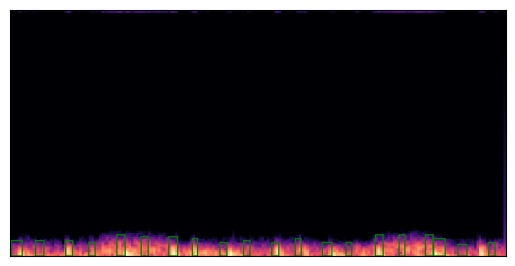

In [14]:
image_path = "../PAST/img_data4/14998_AV.png"
image = io.read_image(image_path)


label = pd.read_csv(output_path, delimiter='\t', header=None)
label = label.values.tolist()
print(label)

height = image.size()[-2]
width = image.size()[-1]
image = image[:-1]

for l in label:
    boxes = torch.tensor([l[:-1]], dtype=torch.float)
    colors = [l[:-1]]
    image = draw_bounding_boxes(image, boxes, colors=['green'], width=2)

show(image)

In [15]:
img_folder_path = ""
tsv_folder_path = ""

tsv_files = [f for f in os.listdir(tsv_folder_path) if f.endswith(".tsv")]
image_files = [f for f in os.listdir(img_folder_path) if f.endswith(".png")]

idx = 0

for i in tsv_files:
    for j in image_files:
        if i[:-3] == j[:-3]:
            idx += 1
            img = img_folder_path + j
            tsv = img_folder_path + i
            save_bbox(img, tsv, output_path)
            print(idx/len(tsv_files),"% 저장완료")


FileNotFoundError: [WinError 3] 지정된 경로를 찾을 수 없습니다: ''